In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
'''This cell tidys the data so it can be better processed'''

EV = pd.read_csv("/Users/juliabaratta/Desktop/epa_EV.csv")
#removes unnecessary rows
EV = EV.iloc[5:-2]
#drops aggrigated rows to avoid unnecessary columns 
EV = EV.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 18', 'Unnamed: 19' ], axis=1)
#renames columns so they make more sense 
# EPS = electric power sector , CS = commercial sector, IS = industrial sector, RS = residential sector
# utl = utility scale, SS = small scale
column_rename = {"Table 3.21. Net Generation from Solar Photovoltaic": "State", "Unnamed: 8": "EPS:Electric_Utilities_Utl2021", "Unnamed: 9": "EPS:Electric_Utilities_Utl2020", "Unnamed: 10": "EPS:IPP_Utl2021", "Unnamed: 11": "EPS:IPP_Utl2020", "Unnamed: 14": "CS:Utl2021", "Unnamed: 15": "CS:Utl2020", "Unnamed: 16": "CS:SS2021", "Unnamed: 17": "CS:SS2020", "Unnamed: 20": "IS:Utl2021", "Unnamed: 21": "IS:Utl2020", "Unnamed: 22": "IS:SS2021", "Unnamed: 23": "IS:SS2020", "Unnamed: 24": "RS:SS2021", "Unnamed: 25": "RS:SS2020"}
EV = EV.rename(columns=column_rename)
#dros rows that don't match the unit of observation
EV = EV.drop([12, 16, 22, 30, 40, 45, 50, 59, 63])

EV = EV.set_index("State")
#deletes commas 
for column in EV.columns: 
    EV[column] = EV[column].str.replace(',', '', regex=True)
    #EV[column] = EV[column].str.replace('0', np.NaN, regex=True)
#converts to int    
EV['RS:SS2020'] = EV['RS:SS2020'].astype(int)
EV['RS:SS2021'] = EV['RS:SS2021'].astype(int)

EV.head(20)

,EPS:Electric_Utilities_Utl2021,EPS:Electric_Utilities_Utl2020,EPS:IPP_Utl2021,EPS:IPP_Utl2020,CS:Utl2021,CS:Utl2020,CS:SS2021,CS:SS2020,IS:Utl2021,IS:Utl2020,IS:SS2021,IS:SS2020,RS:SS2021,RS:SS2020
State,,,,,,,,,,,,,,
New England,144,156,2312,1854,10,11,2401,2030,5,5,155,145,1742,1602
Connecticut,2,3,259,206,3,4,339,275,0,0,46,42,479,418
Maine,0,0,158,28,0,0,68,32,0,0,0,0,67,57
Massachusetts,86,92,1490,1300,7,7,1565,1383,5,5,95,91,873,847
New Hampshire,0,0,4,4,0,0,73,53,0,0,11,9,110,95
Rhode Island,0,0,284,195,0,0,286,220,0,0,1,0,99,79
Vermont,56,61,118,122,0,0,70,66,0,0,2,2,114,106
New Jersey,115,77,1128,1082,128,139,1245,1162,7,8,202,198,1218,1143
New York,0,0,1143,822,10,11,1455,1138,6,7,17,17,1230,1136


In [14]:
#here we see residential small scale generation of PV energy (in thousand MWH) averaged over two years by state

av_RS_SS = (EV['RS:SS2021'] + EV['RS:SS2020'])/2
#print(av_RS_SS)
max_residential_state = av_RS_SS.idxmax()
print(max_residential_state)

#California is the state that produced the most residential PV energy averaged over two years (2020 & 2021)

California


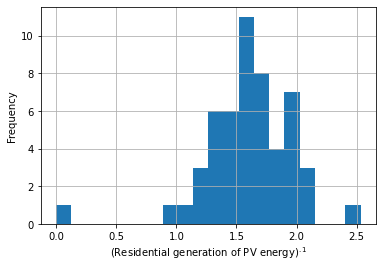

In [15]:
grouped = EV["RS:SS2020"]
grouped = pd.DataFrame(grouped)
grouped['raised'] = (EV["RS:SS2020"]**.1)
grouped['raised'].hist(bins = 20)
plt.xlabel('(Residential generation of PV energy)$^{.1}$')
plt.ylabel('Frequency')
plt.show()